# Magritte quick plots

#### An example notebook for making plots of the most recent Magritte output
---

## Loading Magritte output

Import the `MagritteIO` module for handling the `Magritte` input and output.

In [1]:
import MagritteIO as mio

Get the current (i.e. most recent) output directory and the number of outputs it contains.

In [2]:
outputDirectory = mio.outputDirectory()           # current output directory
nOutputs        = mio.nOutputs(outputDirectory)   # number of outputs

Read the `Magritte` output from the `outputDirectory` into the cell structure. Each output has its own cell structure. `cells` is the array of cell structures for all outputs.

In [3]:
tags  = range(nOutputs)
cells = [mio.cell(outputDirectory, str(tag)) for tag in tags]

## Plot output

Import `matplotlib.pyplot` for plotting.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

### Gas temperature

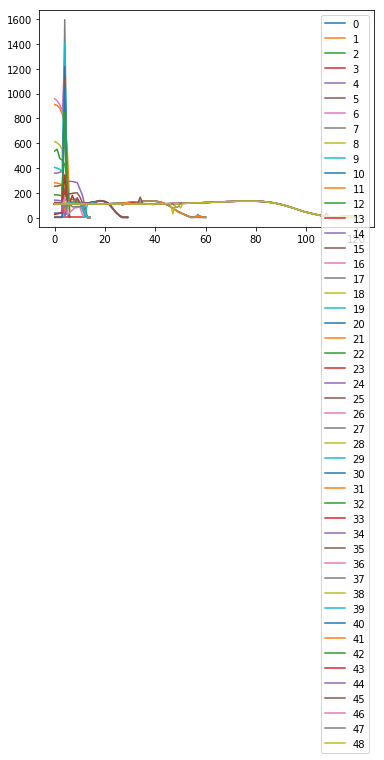

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs):
    ax1.plot(cells[i].temperatureGas, label=i)
ax1.legend()

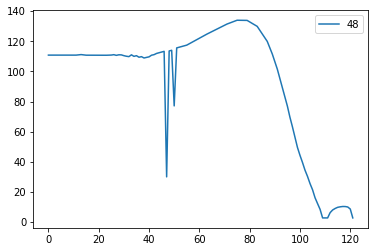

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(cells[nOutputs-1].temperatureGas, label=i)
ax1.legend()

### Dust temperature

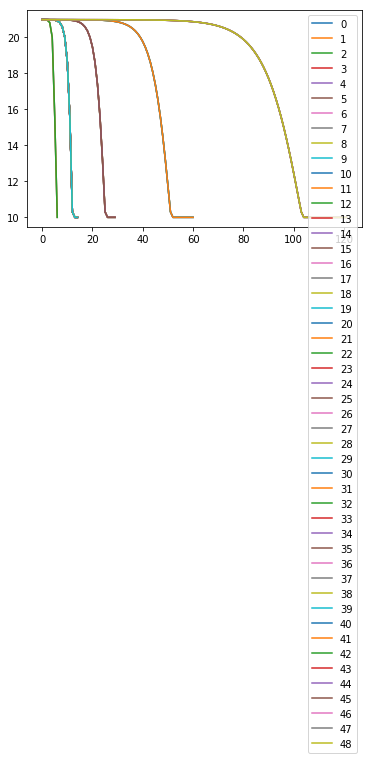

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs):
    ax1.plot(cells[i].temperatureDust, label=i)
ax1.legend()

### Abundances

/usr/lib/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


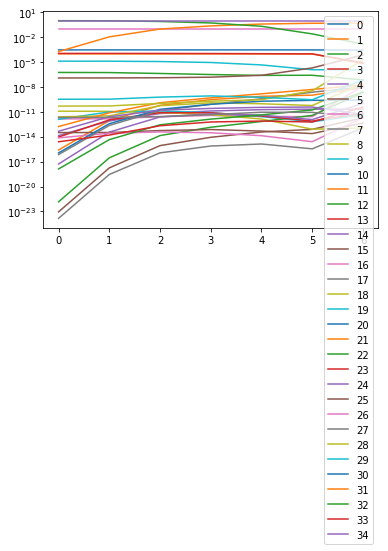

In [8]:
tag = 0

nspec = np.shape(cells[tag].abundances)[1]   # Number of species

fig = plt.figure()
ax1 = fig.add_subplot(111)

for s in range(nspec):
    ax1.plot(cells[tag].abundances[:,s], label=s)
    ax1.set_yscale('log')
ax1.legend()

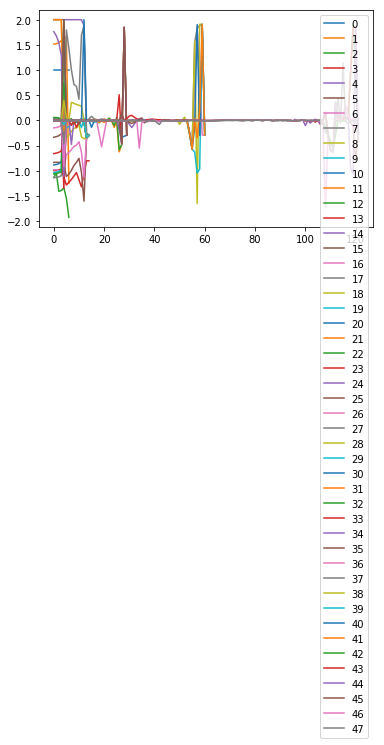

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs-1):
    ax1.plot(cells[i].thermalRatio, label=i)
ax1.legend()

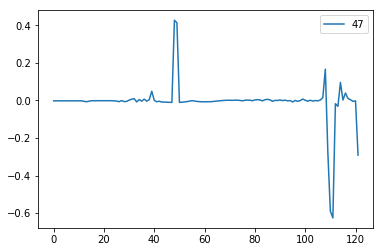

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(cells[nOutputs-1].thermalRatio, label=i)
ax1.legend()

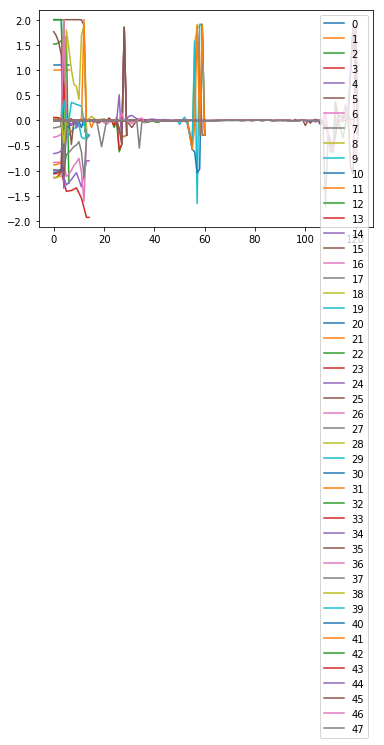

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs-1):
    ax1.plot(cells[i].thermalRatioPrev, label=i)
ax1.legend()

In [11]:
print cells[6].temperatureGas

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(cells[6].temperatureGas)? (<ipython-input-11-e8f66e1d2ca9>, line 1)

In [12]:
def newTemp(cell):
    return (cell.temperatureGas * cell.thermalRatioPrev - cell.temperatureGasPrev * cell.thermalRatio)

def newDen(cell):
    return (cell.thermalRatioPrev - cell.thermalRatio)

In [52]:
print newTemp(cells[5])

[ 11.1726283    0.20609379  -0.21029192  -2.10712812  15.85225966
   2.83891506  -0.05392857]


In [53]:
print newDen(cells[5])

[ 0.09993178  0.005551    0.000238    0.000142    0.11652763  0.03674938
 -0.0197903 ]


In [54]:
print cells[5].thermalRatioPrev

[ 0.1413727   1.519703    1.536493    1.581198    0.1888966   0.05880335
 -0.8220304 ]


In [14]:
print cells[5].thermalRatio

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
